In [4]:
import os
import pandas as pd

In [5]:
# Set the path to the desired directory
path = '/Users/tirdodbehbehani/Desktop/BSE/Term 2/Intro to Text Mining/Final Project/Recommendation_System_Steam'
os.chdir(path)
print("Path:", os.getcwd())

os.listdir()

Path: /Users/tirdodbehbehani/Desktop/BSE/Term 2/Intro to Text Mining/Final Project/Recommendation_System_Steam


['Steam_API_Call(1).ipynb',
 '.DS_Store',
 'Steam_Reviews.csv',
 'data_exploration_tirdod.ipynb',
 'README.md',
 'text_preprocessing.ipynb',
 '.git']

In [6]:
df = pd.read_csv('Steam_Reviews.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40649 entries, 0 to 40648
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Game         40649 non-null  object
 1   Review       40616 non-null  object
 2   Recommended  40649 non-null  bool  
 3   Genre        40649 non-null  object
dtypes: bool(1), object(3)
memory usage: 992.5+ KB


In [8]:
df.head()

,Game,Review,Recommended,Genre
0,Company of Heroes 3,I still believe CoH2 is the superior choice cu...,False,"Action, Strategy"
1,Company of Heroes 3,I Pre-ordered the premium edition version of t...,False,"Action, Strategy"
2,Company of Heroes 3,"An underwhelming, expensive cash grab. Very lo...",False,"Action, Strategy"
3,Company of Heroes 3,Here is my actual review. COH3 has the best Qo...,True,"Action, Strategy"
4,Company of Heroes 3,They listed my GPU as supported and then quiet...,False,"Action, Strategy"


In [9]:
df.describe()

,Game,Review,Recommended,Genre
count,40649,40616,40649,40649
unique,97,25031,2,53
top,PUBG: BATTLEGROUNDS,good,True,"Action, Adventure"
freq,1200,206,34045,5121


In [10]:
max_commas = df['Genre'].str.count(',').max()
print("Maximum number of commas in Genre column:", max_commas)

Maximum number of commas in Genre column: 6


In [11]:
# Split the 'Genre' column by commas and stack the resulting lists into a single series
unique_genres = df['Genre'].str.split(',').explode().str.strip().unique()

# Print the unique values
print("Unique Genres:", unique_genres)

# Print the number of unique values
print("Number of Unique Genres:", len(unique_genres))

Unique Genres: ['Action' 'Strategy' 'Free To Play' 'Adventure' 'Massively Multiplayer'
 'Indie' 'RPG' 'Casual' 'Racing' 'Early Access' 'Simulation'
 'Unknown Genre' 'Sports' 'Violent' 'Education' 'Utilities']
Number of Unique Genres: 16


In [ ]:
for genre in unique_genres:
    df[genre] = df['Genre'].str.contains(genre).astype(bool)

df.columns = [col.lower().replace(' ', '_') for col in df.columns]

# Display the first few rows to verify the new column names
df.head()

,game,review,recommended,genre,action,strategy,free_to_play,adventure,massively_multiplayer,indie,rpg,casual,racing,early_access,simulation,unknown_genre,sports,violent,education,utilities
0,Company of Heroes 3,I still believe CoH2 is the superior choice cu...,False,"Action, Strategy",True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Company of Heroes 3,I Pre-ordered the premium edition version of t...,False,"Action, Strategy",True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Company of Heroes 3,"An underwhelming, expensive cash grab. Very lo...",False,"Action, Strategy",True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Company of Heroes 3,Here is my actual review. COH3 has the best Qo...,True,"Action, Strategy",True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Company of Heroes 3,They listed my GPU as supported and then quiet...,False,"Action, Strategy",True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
df.tail()

,game,review,recommended,genre,action,strategy,free_to_play,adventure,massively_multiplayer,indie,rpg,casual,racing,early_access,simulation,unknown_genre,sports,violent,education,utilities
40644,Baldur's Gate 3,It's not just a game! It's a whole story that ...,True,"Adventure, RPG, Strategy",False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False
40645,Baldur's Gate 3,It's the closest you're going to get to playin...,True,"Adventure, RPG, Strategy",False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False
40646,Baldur's Gate 3,verry gooood gammeeee. I slept on it for to lo...,True,"Adventure, RPG, Strategy",False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False
40647,Baldur's Gate 3,Funny wild magic sorceror Durge run made every...,True,"Adventure, RPG, Strategy",False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False
40648,Baldur's Gate 3,this game is amazing and a blast to play. ever...,True,"Adventure, RPG, Strategy",False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False


In [14]:
from textblob import TextBlob

# Define a function to get the sentiment polarity
def get_sentiment(review):
    analysis = TextBlob(review)
    return analysis.sentiment.polarity

# Apply the function to the 'review' column and create new columns for sentiment
df['sentiment'] = df['review'].apply(lambda x: get_sentiment(x) if pd.notnull(x) else 0)
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Display the first few rows to verify the new columns
df.head()

,game,review,recommended,genre,action,strategy,free_to_play,adventure,massively_multiplayer,indie,...,racing,early_access,simulation,unknown_genre,sports,violent,education,utilities,sentiment,sentiment_label
0,Company of Heroes 3,I still believe CoH2 is the superior choice cu...,False,"Action, Strategy",True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,-0.099038,negative
1,Company of Heroes 3,I Pre-ordered the premium edition version of t...,False,"Action, Strategy",True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,-0.120652,negative
2,Company of Heroes 3,"An underwhelming, expensive cash grab. Very lo...",False,"Action, Strategy",True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,-0.194095,negative
3,Company of Heroes 3,Here is my actual review. COH3 has the best Qo...,True,"Action, Strategy",True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,-0.006922,negative
4,Company of Heroes 3,They listed my GPU as supported and then quiet...,False,"Action, Strategy",True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,0.183333,positive


/var/folders/yc/3pyxzslx2r38qfymk39c_bpw0000gn/T/ipykernel_44937/990383317.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


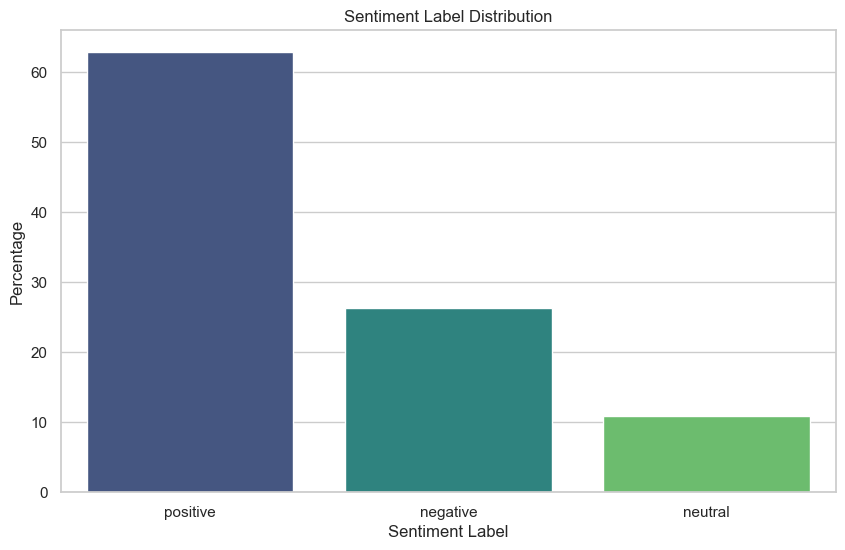

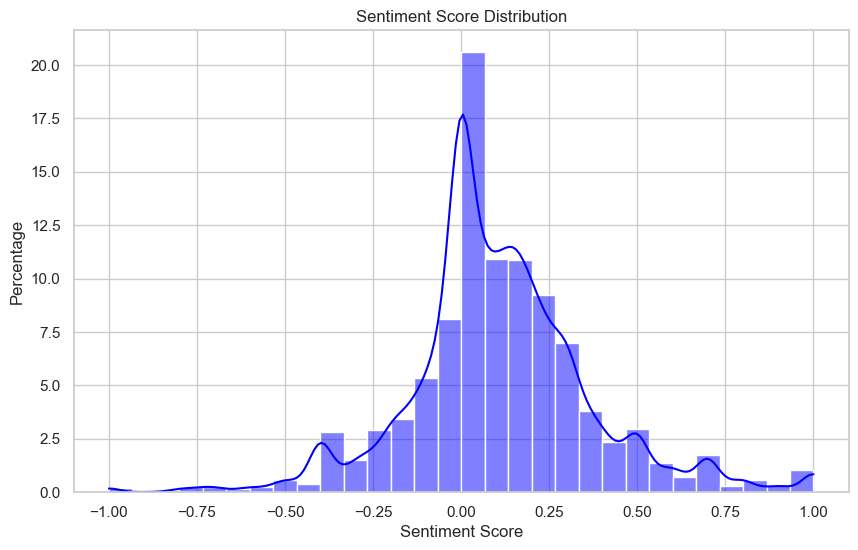

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the visualization
sns.set_theme(style="whitegrid")

# Calculate the percentage of each sentiment label
sentiment_counts = df['sentiment_label'].value_counts(normalize=True) * 100

# Create a bar plot for the sentiment labels with percentages
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Label Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Percentage')
plt.show()

# Create a histogram for the sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=30, kde=True, color='blue', stat='percent')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Percentage')
plt.show()

action                   0.071229
strategy                 0.021447
free_to_play             0.007255
adventure                0.050043
massively_multiplayer    0.006887
indie                    0.033354
rpg                      0.038207
casual                   0.011339
racing                   0.001796
early_access             0.009366
simulation               0.017876
unknown_genre            0.000718
sports                   0.001225
violent                  0.000000
education                0.000212
utilities                0.002046
dtype: float64


/var/folders/yc/3pyxzslx2r38qfymk39c_bpw0000gn/T/ipykernel_44937/4101670080.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_sentiment.index, y=genre_sentiment.values, palette='viridis')


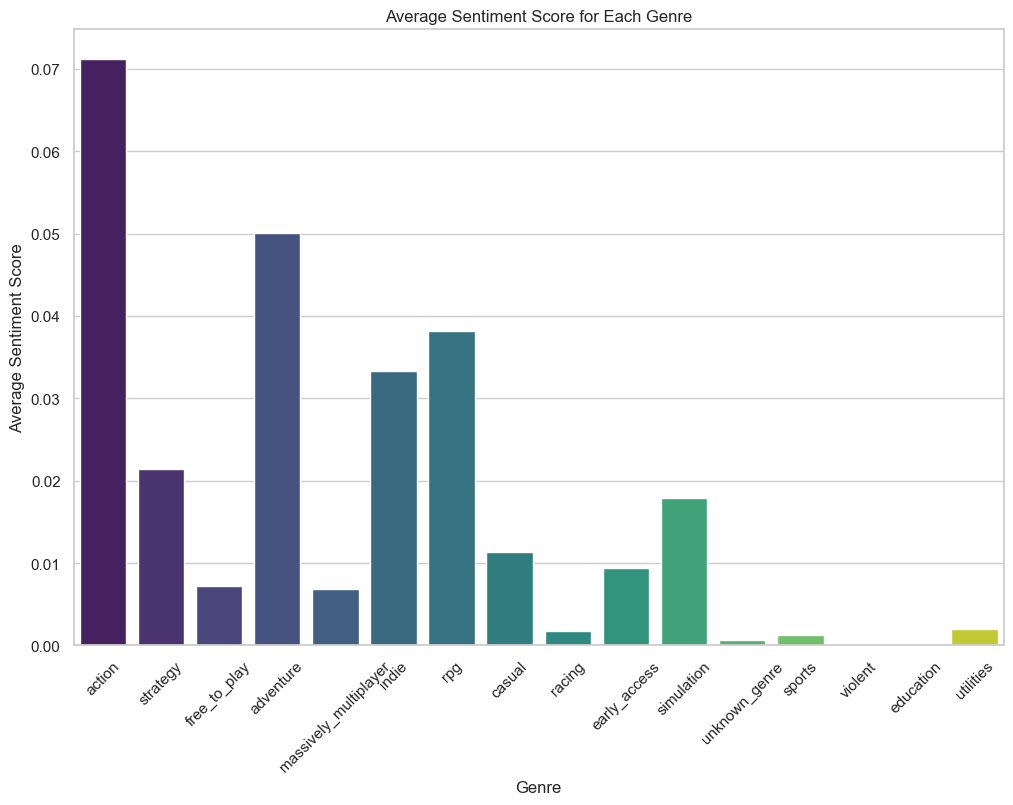

In [20]:
# Convert unique_genres to match the column names in df
unique_genres_lower = [genre.lower().replace(' ', '_') for genre in unique_genres]

# Calculate the average sentiment score for each genre
genre_sentiment = df[unique_genres_lower].multiply(df['sentiment'], axis="index").mean()

# Display the average sentiment score for each genre
print(genre_sentiment)

# Plot the average sentiment score for each genre
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_sentiment.index, y=genre_sentiment.values, palette='viridis')
plt.title('Average Sentiment Score for Each Genre')
plt.xlabel('Genre')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.show()